# Objective
The data consists of weather parameters like temperature, dewpoint, humidity, windspeed and air pressure which can be used as predictors in rainfall prediction models.The dataset consists DAY-WISE data beginning from 01-01-2016 until 15-11-2020.The model aims to accurately forecast rainfall patterns on a day-to-day basis, leveraging the provided dataset to identify relationships and patterns between weather parameters and precipitation. The ultimate goal is to enhance our understanding of rainfall dynamics and improve the accuracy of short-term rainfall predictions for the given timeframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import os
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

raindata = pd.read_csv(r"C:\Users\Asus\Documents\Machine Learning\Practice\Project\rainfall.csv")
raindata

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0
...,...,...,...,...,...,...,...,...,...,...
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0


In [2]:
raindata.drop(["datetime", "precipprob"], axis = 1).describe()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,28.342560,21.644975,69.565974,1008.878046,201.304267,228.169175,22.309882,0.456485
std,1.960027,4.532065,14.533809,3.706157,47.075559,57.034865,6.360669,0.498243
min,20.200000,5.000000,28.600000,994.100000,65.600000,52.800000,9.400000,0.000000
25%,27.200000,18.100000,58.000000,1006.200000,163.700000,194.600000,18.400000,0.000000
50%,28.500000,23.800000,71.600000,1009.100000,204.500000,232.300000,22.300000,0.000000
75%,29.700000,25.300000,81.200000,1011.800000,240.900000,274.400000,24.600000,1.000000
max,32.800000,27.500000,98.200000,1017.400000,316.000000,330.900000,128.100000,1.000000


In [3]:
raindata.shape

(1781, 10)

In [4]:
raindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          1781 non-null   object 
 1   temp              1781 non-null   float64
 2   dew               1781 non-null   float64
 3   humidity          1781 non-null   float64
 4   sealevelpressure  1781 non-null   float64
 5   winddir           1781 non-null   float64
 6   solarradiation    1781 non-null   float64
 7   windspeed         1781 non-null   float64
 8   precipprob        1781 non-null   int64  
 9   preciptype        1781 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 139.3+ KB


In [5]:
raindata.isnull().sum()

datetime            0
temp                0
dew                 0
humidity            0
sealevelpressure    0
winddir             0
solarradiation      0
windspeed           0
precipprob          0
preciptype          0
dtype: int64

In [6]:
raindata.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'sealevelpressure', 'winddir',
       'solarradiation', 'windspeed', 'precipprob', 'preciptype'],
      dtype='object')

In [7]:
raindata.dtypes

datetime             object
temp                float64
dew                 float64
humidity            float64
sealevelpressure    float64
winddir             float64
solarradiation      float64
windspeed           float64
precipprob            int64
preciptype            int64
dtype: object

In [8]:
raindata.head()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0


In [9]:
raindata.tail()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
1776,11-11-2020,27.4,12.2,41.5,1011.8,108.3,220.4,17.2,0,0
1777,12-11-2020,28.0,13.0,40.9,1012.6,148.4,225.1,16.6,0,0
1778,13-11-2020,28.4,18.7,56.9,1011.9,131.8,223.4,18.4,0,0
1779,14-11-2020,29.5,20.9,61.3,1010.2,154.2,232.7,19.3,0,0
1780,15-11-2020,29.7,22.3,65.4,1010.7,150.5,225.9,17.1,0,0


##### Checking for dependencies among variables using the correlation matrix.

<Axes: >

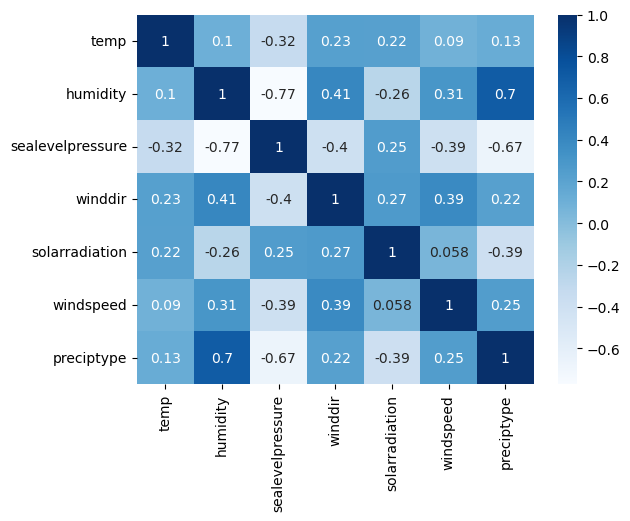

In [10]:
raindata1 = raindata.drop(["datetime", "precipprob", "dew"], axis = 1) #dropping features not useful for analysis
corMatrix = pd.DataFrame.corr(raindata1)
corMatrix
sns.heatmap(corMatrix, annot = True, cmap = "Blues")

* Note that dew point temperature is dropped from the dataframe as humidity and dew point are linearly related which causes a high linear dependency between them.

#### Plotting distributions of each variable

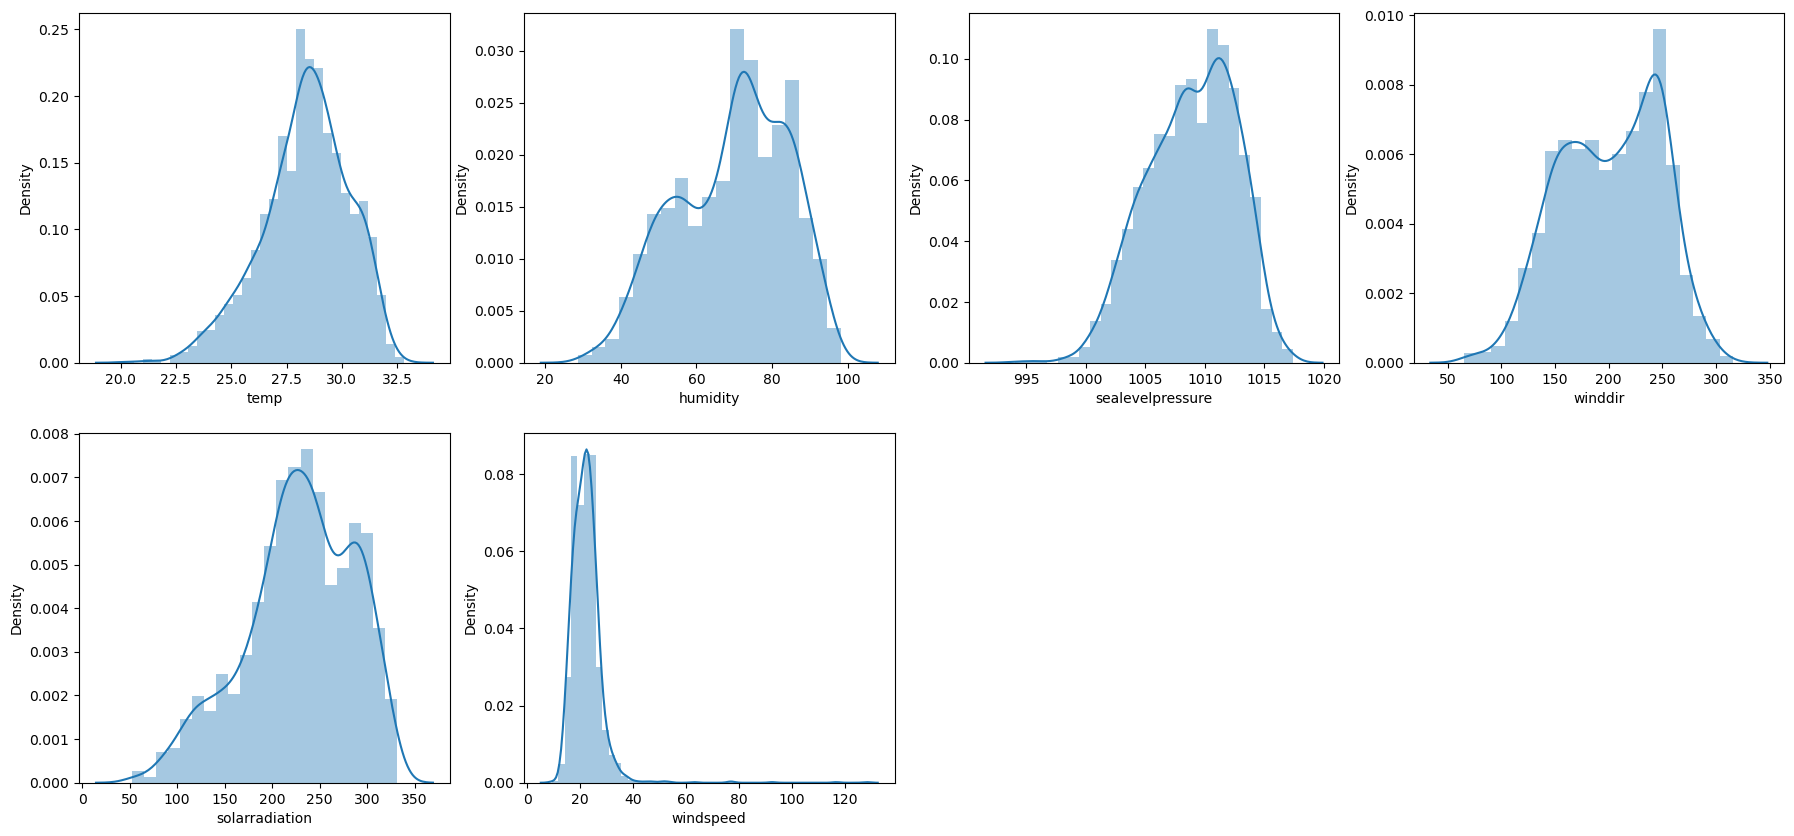

In [11]:
fig_data = raindata1.drop("preciptype", axis = 1)
plt.figure(figsize= (22,10))
feature_name = list(["temp", "humidity", "sealevelpressure", "winddir", "solarradiation", "windspeed"])
for i in range(6):
    plt.subplot(2,4,i+1)
    sns.distplot(fig_data[feature_name[i]])

#### Checking if the categories of the dependent variable are balanced.

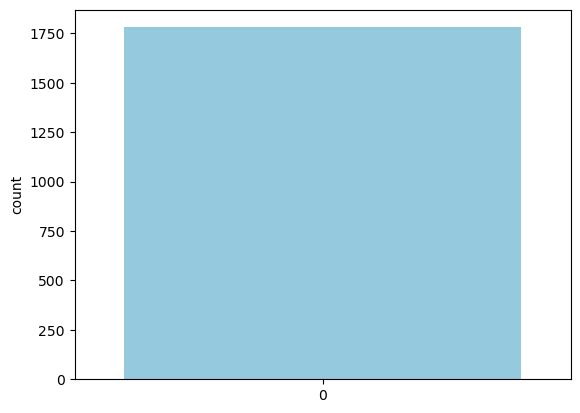

In [12]:
sns.countplot(raindata1["preciptype"], palette = ["#87CEEB", "#191970"])
plt.show()

In [13]:
raindata1 = raindata.drop(["datetime", "precipprob", "dew"], axis = 1)

In [14]:
X = raindata1.loc[:, list(raindata1.columns)[0:6]]
y = raindata1.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

X = raindata1.drop('preciptype', axis = 1)
Y = raindata1[['preciptype']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56) 

In [16]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
90,28.3,70.6,1011.5,204.7,295.5,22.3,0
73,26.6,68.0,1012.9,203.8,296.8,24.1,0
100,30.3,62.1,1010.8,261.5,302.1,25.9,0
1633,29.9,81.1,1004.7,191.5,166.8,22.3,1
1480,26.1,60.5,1013.2,148.5,217.5,16.7,0


# Model performed:
#### 1. Logistic Regression
#### 2. Decision Tree Classifier
#### 3. Random Forest Classifier

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
Model3 = sfs(logreg, n_features_to_select=5, direction='forward', scoring='accuracy')
Model3.fit(X_train,y_train) 

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=5, scoring='accuracy')

In [18]:
Model3.feature_names_in_

array(['temp', 'humidity', 'sealevelpressure', 'winddir',
       'solarradiation', 'windspeed'], dtype=object)

In [19]:
Model3.get_feature_names_out()

array(['humidity', 'sealevelpressure', 'winddir', 'solarradiation',
       'windspeed'], dtype=object)

In [20]:
X_train = X_train.loc[:,['temp', 'humidity', 'sealevelpressure', 'winddir','solarradiation']]
X_train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation
90,28.3,70.6,1011.5,204.7,295.5
73,26.6,68.0,1012.9,203.8,296.8
100,30.3,62.1,1010.8,261.5,302.1
1633,29.9,81.1,1004.7,191.5,166.8
1480,26.1,60.5,1013.2,148.5,217.5


In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train)

In [22]:
output.intercept_

array([0.00046197])

In [23]:
output.coef_

array([[ 0.23257163,  0.20593412, -0.01648238, -0.0025375 , -0.01854391]])

In [24]:
output.feature_names_in_

array(['temp', 'humidity', 'sealevelpressure', 'winddir',
       'solarradiation'], dtype=object)

In [25]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype
90,28.3,70.6,1011.5,204.7,295.5,0
73,26.6,68.0,1012.9,203.8,296.8,0
100,30.3,62.1,1010.8,261.5,302.1,0
1633,29.9,81.1,1004.7,191.5,166.8,1
1480,26.1,60.5,1013.2,148.5,217.5,0


In [26]:
train['Probability_Bad']= output.predict_proba(X_train)[:,1]  # [Row , column]
train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Probability_Bad
90,28.3,70.6,1011.5,204.7,295.5,0,0.175102
73,26.6,68.0,1012.9,203.8,296.8,0,0.074084
100,30.3,62.1,1010.8,261.5,302.1,0,0.043515
1633,29.9,81.1,1004.7,191.5,166.8,1,0.971160
1480,26.1,60.5,1013.2,148.5,217.5,0,0.070406


In [27]:
train['Predicted'] = np.where(train['Probability_Bad'] >= 0.7,1,0) 
train

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Probability_Bad,Predicted
90,28.3,70.6,1011.5,204.7,295.5,0,0.175102,0
73,26.6,68.0,1012.9,203.8,296.8,0,0.074084,0
100,30.3,62.1,1010.8,261.5,302.1,0,0.043515,0
1633,29.9,81.1,1004.7,191.5,166.8,1,0.971160,1
1480,26.1,60.5,1013.2,148.5,217.5,0,0.070406,0
...,...,...,...,...,...,...,...,...
1259,29.1,80.7,1001.6,171.0,286.9,1,0.754780,1
1442,26.1,67.8,1012.8,152.1,209.7,0,0.281901,0
1216,29.8,69.9,1006.2,239.6,306.7,0,0.174498,0
399,26.3,65.3,1014.2,193.7,232.9,0,0.123226,0


In [28]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['preciptype'])
matrix

array([[735, 153],
       [ 36, 500]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(train['preciptype'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       771
           1       0.93      0.77      0.84       653

    accuracy                           0.87      1424
   macro avg       0.88      0.86      0.86      1424
weighted avg       0.88      0.87      0.87      1424



#### TEST

In [30]:
X_test = X_test.loc[:,['temp', 'humidity', 'sealevelpressure', 'winddir','solarradiation']]
X_test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation
707,25.2,77.7,1011.0,193.6,184.8
520,31.2,72.3,1006.0,197.0,233.2
1210,30.7,63.8,1008.8,273.1,310.0
1170,27.2,51.3,1012.0,218.1,290.0
1542,27.7,69.8,1011.7,248.2,296.3


In [31]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype
707,25.2,77.7,1011.0,193.6,184.8,0
520,31.2,72.3,1006.0,197.0,233.2,1
1210,30.7,63.8,1008.8,273.1,310.0,0
1170,27.2,51.3,1012.0,218.1,290.0,0
1542,27.7,69.8,1011.7,248.2,296.3,0


In [32]:
test['Probability_Bad'] = output.predict_proba(X_test)[:,1]
test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Probability_Bad
707,25.2,77.7,1011.0,193.6,184.8,0,0.782533
520,31.2,72.3,1006.0,197.0,233.2,1,0.677025
1210,30.7,63.8,1008.8,273.1,310.0,0,0.057866
1170,27.2,51.3,1012.0,218.1,290.0,0,0.003267
1542,27.7,69.8,1011.7,248.2,296.3,0,0.121032


In [33]:
test['Predicted'] = np.where(test['Probability_Bad'] >= 0.7,1,0) 
test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Probability_Bad,Predicted
707,25.2,77.7,1011.0,193.6,184.8,0,0.782533,1
520,31.2,72.3,1006.0,197.0,233.2,1,0.677025,0
1210,30.7,63.8,1008.8,273.1,310.0,0,0.057866,0
1170,27.2,51.3,1012.0,218.1,290.0,0,0.003267,0
1542,27.7,69.8,1011.7,248.2,296.3,0,0.121032,0


In [34]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['preciptype'])
print(matrix)

[[191  41]
 [  6 119]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(test['preciptype'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       197
           1       0.95      0.74      0.84       160

    accuracy                           0.87       357
   macro avg       0.89      0.86      0.86       357
weighted avg       0.88      0.87      0.87       357



##### train accuracy = 86
##### test accuracy = 87

### Business / Client Submission

In [36]:
Model_Values = pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,0.000462


In [37]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient'])
abc

,Coefficient
temp,0.232572
humidity,0.205934
sealevelpressure,-0.016482
winddir,-0.002538
solarradiation,-0.018544


In [38]:
from sklearn.metrics import classification_report
print(classification_report(train['preciptype'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       771
           1       0.93      0.77      0.84       653

    accuracy                           0.87      1424
   macro avg       0.88      0.86      0.86      1424
weighted avg       0.88      0.87      0.87      1424



# Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, 
                               criterion="gini",
                               max_depth=4, 
                               min_samples_split=100,
                               min_samples_leaf=50,
                               max_features="sqrt") 

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

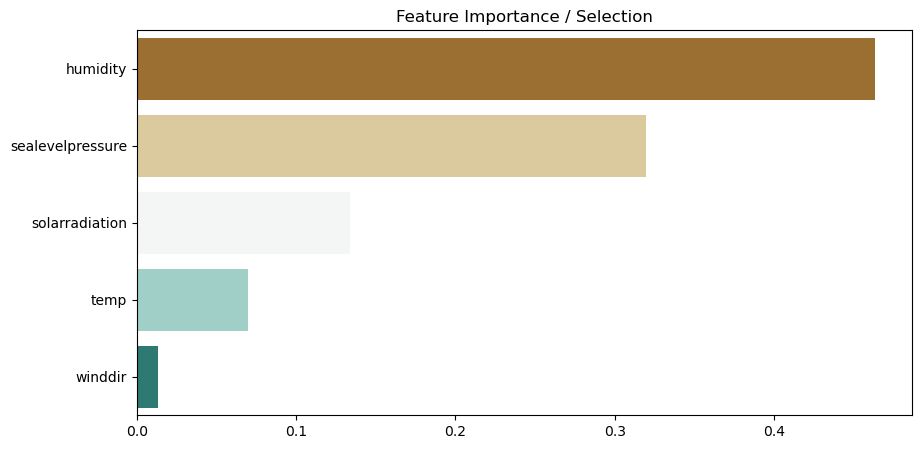

In [40]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')


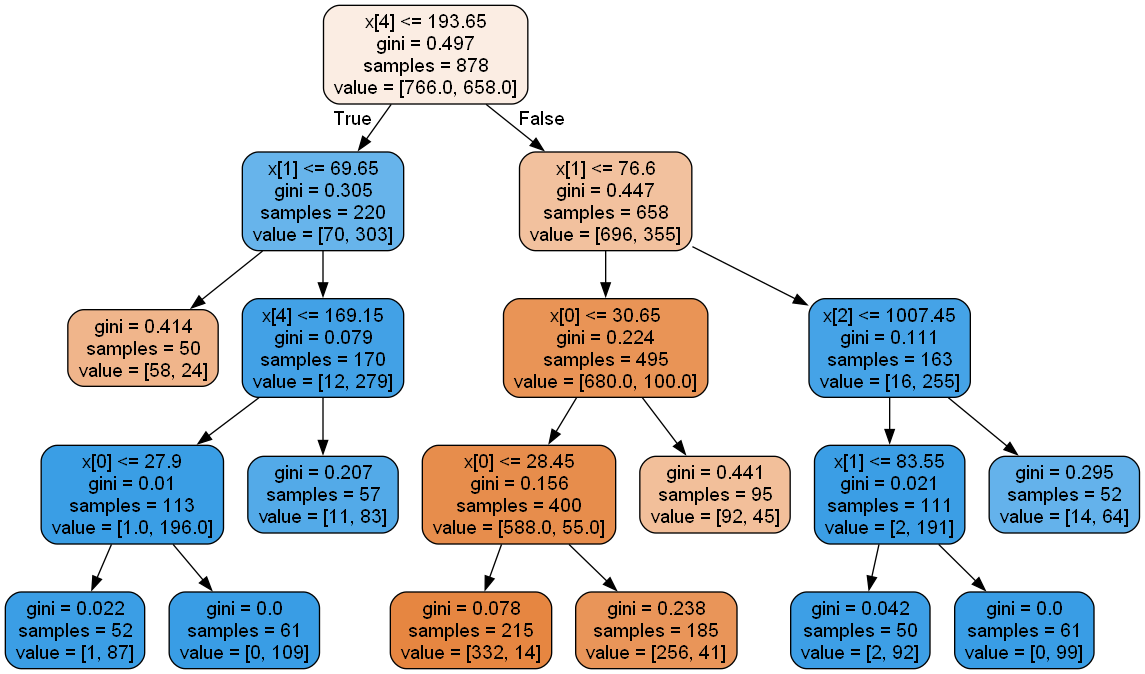

In [41]:
from sklearn.tree import export_graphviz

import pydot

tree = Model.estimators_[2]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'Model.dot', 
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('Model.dot')
graph.write_png('Model.png')


from IPython.display import Image
Image(filename = 'Model.png')

#### Predictions on Train Dataset

In [42]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype
90,28.3,70.6,1011.5,204.7,295.5,0
73,26.6,68.0,1012.9,203.8,296.8,0
100,30.3,62.1,1010.8,261.5,302.1,0
1633,29.9,81.1,1004.7,191.5,166.8,1
1480,26.1,60.5,1013.2,148.5,217.5,0


In [43]:
train['Predicted'] = Model.predict(X_train)
train.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Predicted
90,28.3,70.6,1011.5,204.7,295.5,0,0
73,26.6,68.0,1012.9,203.8,296.8,0,0
100,30.3,62.1,1010.8,261.5,302.1,0,0
1633,29.9,81.1,1004.7,191.5,166.8,1,1
1480,26.1,60.5,1013.2,148.5,217.5,0,0


#### Model Performance Metrics

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['preciptype'])
print(confusion_matrix)

[[735 122]
 [ 36 531]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(train['preciptype'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       771
           1       0.94      0.81      0.87       653

    accuracy                           0.89      1424
   macro avg       0.90      0.88      0.89      1424
weighted avg       0.89      0.89      0.89      1424



#### Predictions on Test Dataset

In [46]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype
707,25.2,77.7,1011.0,193.6,184.8,0
520,31.2,72.3,1006.0,197.0,233.2,1
1210,30.7,63.8,1008.8,273.1,310.0,0
1170,27.2,51.3,1012.0,218.1,290.0,0
1542,27.7,69.8,1011.7,248.2,296.3,0


In [47]:
test['Predicted'] = Model.predict(X_test)
test.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,preciptype,Predicted
707,25.2,77.7,1011.0,193.6,184.8,0,1
520,31.2,72.3,1006.0,197.0,233.2,1,0
1210,30.7,63.8,1008.8,273.1,310.0,0,0
1170,27.2,51.3,1012.0,218.1,290.0,0,0
1542,27.7,69.8,1011.7,248.2,296.3,0,0


#### Model Performance Metrics on Test data

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['preciptype'])
print(confusion_matrix)

[[184  31]
 [ 13 129]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test['preciptype'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       197
           1       0.91      0.81      0.85       160

    accuracy                           0.88       357
   macro avg       0.88      0.87      0.87       357
weighted avg       0.88      0.88      0.88       357



#### Business Submission

In [50]:
print(classification_report(train['preciptype'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       771
           1       0.94      0.81      0.87       653

    accuracy                           0.89      1424
   macro avg       0.90      0.88      0.89      1424
weighted avg       0.89      0.89      0.89      1424



# Model Export

In [51]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [52]:
import pickle

pickle.dump(Model, open(r"C:\Users\Asus\Documents\Machine Learning\Practice\Project\build.pkl",'wb')) 

# KNN

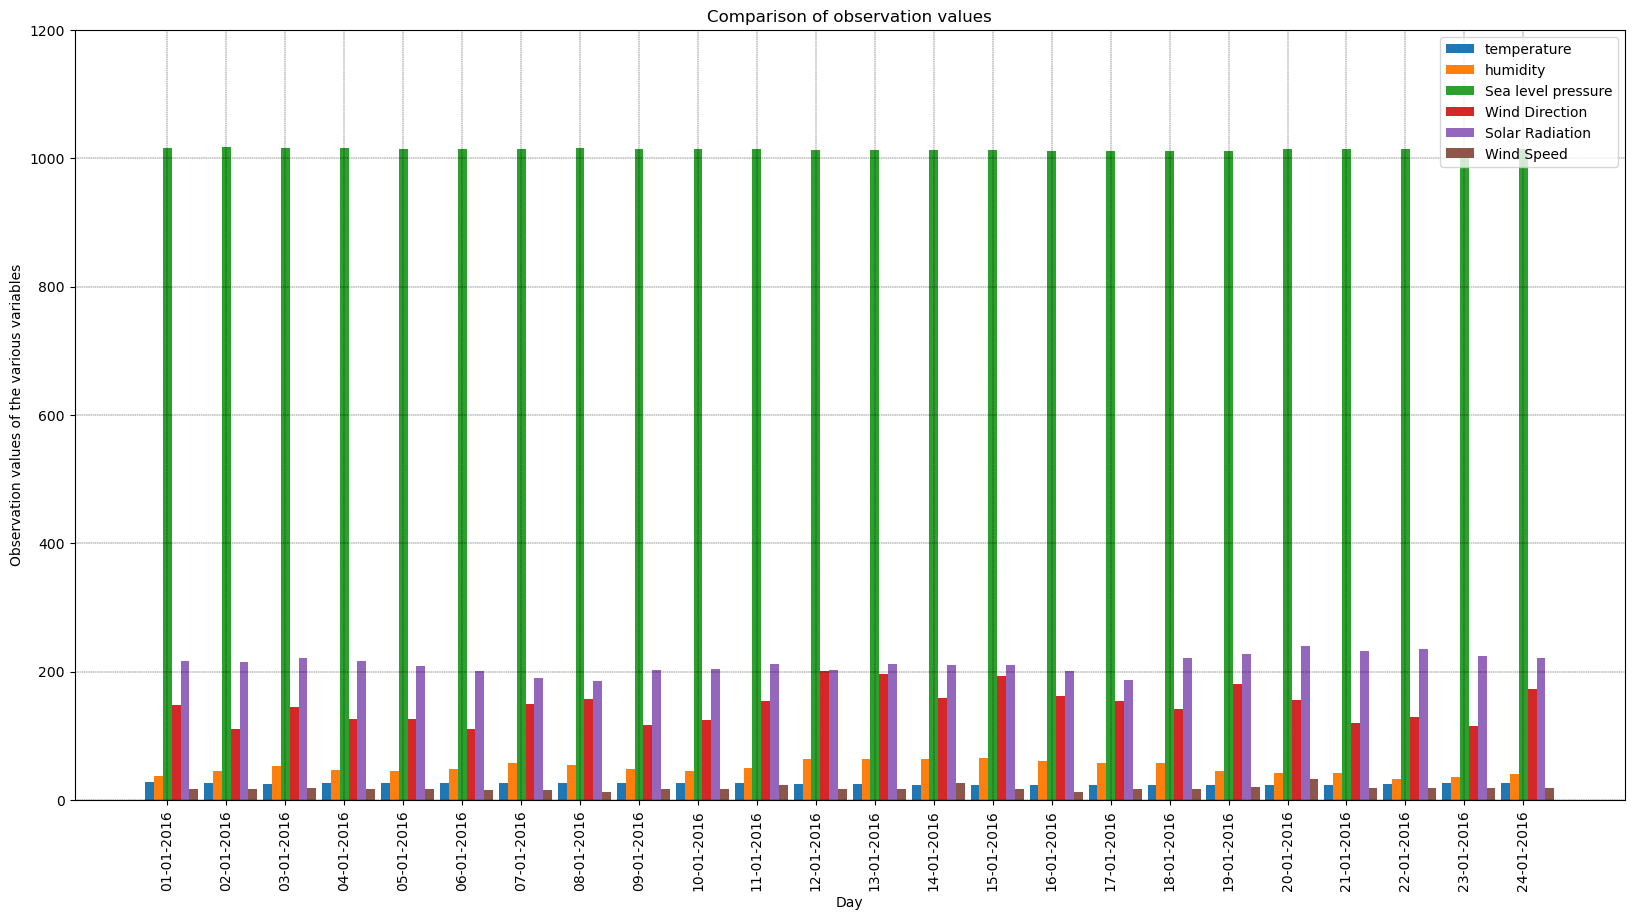

In [53]:
day = raindata["datetime"].head(24)
temperature = raindata1["temp"].head(24)
humidity = raindata1["humidity"].head(24)
pressure = raindata1["sealevelpressure"].head(24)
winddirection = raindata1["winddir"].head(24)
radiation = raindata1["solarradiation"].head(24)
speed = raindata1["windspeed"].head(24)
fig, ax = plt.subplots(figsize =(20, 10))
x_axis = np.arange(len(day))
width = 0.15
plt.bar(x_axis - (2*width), temperature, width = width,label = "temperature")
plt.bar(x_axis - width, humidity, width = width, label = "humidity")
plt.bar(x_axis, pressure, width = width, label = "Sea level pressure")
plt.bar(x_axis+width, winddirection, width = width, label = "Wind Direction")
plt.bar(x_axis+(2*width), radiation, width = width, label = "Solar Radiation")
plt.bar(x_axis+(3*width), speed, width = width, label = "Wind Speed")
plt.ylim(0,1200)
plt.xticks(ticks = x_axis, labels = day, rotation = "vertical")
plt.title("Comparison of observation values")
plt.xlabel("Day")
plt.ylabel("Observation values of the various variables")
plt.grid(color = "black", linestyle = "--", linewidth = 0.3)
plt.legend()

* Normalising data using z score method as ranges of variables sealevelpressure and wind direction are very separated from the rest of the variables. This is important because the KNN classifier uses distance as a measure for classification.

raindata1= raindata1.drop(columns='datetime', axis=0) 

In [54]:
#normalising using z score method
raindata_scaled = raindata1.copy()
raindata_scaled = raindata_scaled.drop("preciptype", axis = 1)
for column in raindata_scaled.columns:
    raindata_scaled[column] = (raindata_scaled[column]-raindata_scaled[column].mean())/raindata_scaled[column].std()
    
display(raindata_scaled)

,temp,humidity,sealevelpressure,winddir,solarradiation,windspeed
0,0.029306,-2.185661,2.029583,-1.142934,-0.211610,-0.897686
1,-0.787010,-1.704025,2.245440,-1.933153,-0.218624,-0.897686
2,-1.450266,-1.153584,1.840708,-1.189668,-0.123945,-0.614697
3,-0.991089,-1.580176,1.732780,-1.580529,-0.209857,-0.897686
4,-0.633951,-1.697145,1.489941,-1.610268,-0.351876,-0.897686
...,...,...,...,...,...,...
1776,-0.480892,-1.931082,0.788405,-1.975638,-0.136218,-0.803356
1777,-0.174773,-1.972365,1.004262,-1.123816,-0.053812,-0.897686
1778,0.029306,-0.871483,0.815387,-1.476441,-0.083619,-0.614697
1779,0.590522,-0.568741,0.356691,-1.000610,0.079440,-0.473202


In [55]:
raindata_scaled["preciptype"] = raindata1["preciptype"]
raindata_scaled.head(20)

,temp,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
0,0.029306,-2.185661,2.029583,-1.142934,-0.211610,-0.897686,0
1,-0.787010,-1.704025,2.245440,-1.933153,-0.218624,-0.897686,0
2,-1.450266,-1.153584,1.840708,-1.189668,-0.123945,-0.614697,0
3,-0.991089,-1.580176,1.732780,-1.580529,-0.209857,-0.897686,0
4,-0.633951,-1.697145,1.489941,-1.610268,-0.351876,-0.897686,0
5,-0.735990,-1.470088,1.435976,-1.935277,-0.479867,-1.180675,0
6,-1.144148,-0.795798,1.678815,-1.102574,-0.670979,-1.023459,0
7,-0.889049,-0.988452,1.759762,-0.926261,-0.756891,-1.463664,0
8,-1.042108,-1.511371,1.328048,-1.780208,-0.439541,-0.897686,0
9,-1.195168,-1.669622,1.435976,-1.627262,-0.429021,-0.897686,0


### Fitting KNN model

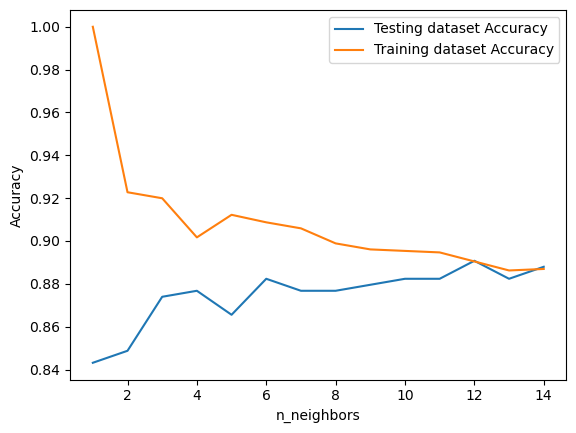

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

* Training and testing dataset is showing almost same accuracy. 

#### Using k-fold cross validation to check for general model accuracy.

In [57]:
y = raindata_scaled["preciptype"].values
X = raindata_scaled.drop(columns=["preciptype"])


from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv = 5)
print('KNN train accuracy:{}'.format(np.mean(cv_scores)))

KNN train accuracy:0.8686681492463553


#### Hyperparameter tuning using GridSearchCV

* Helps us loop through different hyperparameters and fit our estimator (model) based on the training dataset. In the end the best hyperparameters can be chosen.

In [58]:
from sklearn.model_selection import GridSearchCV
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [1,15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

print(grid_kn.best_estimator_)
print(grid_kn.best_params_)
print(grid_kn.score(X_test, y_test))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
KNeighborsClassifier(n_neighbors=15, weights='distance')
{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}
0.876750700280112


# MODEL PERFORMANCE

In [59]:
model_performance = {
    'Model Name': ['Logistic Regression', 'KNN', 'Random Forest Classifier'],
    'Accuracy of Train Model': [87, 86, 88],
    'Accuracy of Test Model': [87,87,89]}
model_performance = pd.DataFrame(model_performance)
model_performance

,Model Name,Accuracy of Train Model,Accuracy of Test Model
0,Logistic Regression,87,87
1,KNN,86,87
2,Random Forest Classifier,88,89


### Conclusion

##### * out of all 3 algorithms performed on the given dataset Random Forest Classifier outperformed with accuracy 89%.